# Sentiment Analysis of Stocks based on News Article Headlines

## Introduction

Predit whether the dow jones will move up or down based on News Headline feedback.
This allows for additional input over the traditional numeric comparisons. News gives a good indicator of the general consensus of a stock and people can use this to inform investment decisions.

The Dataset used includes Stock Price Shifts and the world news headlines. 
- label 0: Stock shifted down in price
- label 1: Stock shifted up in price / stayed the same

https://www.kaggle.com/datasets/aaron7sun/stocknews?select=RedditNews.csv
- Sun, J. (2016, August). Daily News for Stock Market Prediction, Version 1. Retrieved [Date You Retrieved This Data] from https://www.kaggle.com/aaron7sun/stocknews

- News Data: Historical Headlines from /r/worldnews. Ranked by reddit users' votes and only the top 25 headlines for a single date (2008 - 2016)
- Stock Data: Dow Jones Industrial Avg 

### Plan:
- Pre-Processing:
    - Lowercase
    - Remove Punctuation
    - Sentence Tokenization
    - Remove Stop Words
    - Stemming
    - Lemetization
    - Vectorize: Bag of Words, TF-IDF, Word2Vec
- Analysis:
    - Logistic Reg
    - SVM
    - Random Forest
        - Accuracy, Precision, Recall, F1 Score, AUC

## Libraries

In [1]:
## Import Libraries
import pandas as pd

import regex as re
import spacy

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

from collections import Counter


c:\Users\I am Navin\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import numpy as np

## Dataset

In [3]:
data = pd.read_csv(r"C:\Users\I am Navin\Documents\Data Science Course\Module\Projects\MiniProject_3\Combined_News_DJIA.csv")
df = pd.DataFrame(data)

In [4]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [5]:
df.shape

(1989, 27)

## Simple Model: Try just 1 col headline

In [6]:
df_simple = df.iloc[:,0:3]

In [7]:
df_simple.head()

,Date,Label,Top1
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou..."
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...
4,2008-08-14,1,b'All the experts admit that we should legalis...


In [8]:
df_simple['Label'].value_counts()

1    1065
0     924
Name: Label, dtype: int64

In [9]:
924/1065

0.8676056338028169

## Prepare Text

- lowercase
- Remove Punctuation
- remove the b at the start

In [10]:
df_simple.iloc[0,2]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war"'

In [11]:
#Remove b at the start
test = df_simple.iloc[1,2]
test = re.sub(r'[\bb\b]','',test)
test

"'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'"

In [12]:
#Remove quotations
test = re.sub(r"[\'\"]", "", test)
test

'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'

In [13]:
#Remove punctuation
test = re.sub(r'[^\w\s]', '', test)
test

'Why wont America and Nato help us If they wont help us now why did we help them in Iraq'

In [14]:
#Remove Extra whitespaces
re.sub(r'\s+', ' ', test)

'Why wont America and Nato help us If they wont help us now why did we help them in Iraq'

In [15]:
def clean_text(text):
    #Remove b at the start
    text = re.sub(r'^b', '', text) #re.sub(r'[\bb\b]','',text) 
    #Remove quotations
    text = re.sub(r"[\'\"]", "", text)
    #Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    #Remove Extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    #Convert text to lowercase
    text = text.lower()

    return text 


In [16]:
df.iloc[:,2]

0       b"Georgia 'downs two Russian warplanes' as cou...
1       b'Why wont America and Nato help us? If they w...
2       b'Remember that adorable 9-year-old who sang a...
3       b' U.S. refuses Israel weapons to attack Iran:...
4       b'All the experts admit that we should legalis...
                              ...                        
1984    Barclays and RBS shares suspended from trading...
1985    2,500 Scientists To Australia: If You Want To ...
1986                     Explosion At Airport In Istanbul
1987    Jamaica proposes marijuana dispensers for tour...
1988    A 117-year-old woman in Mexico City finally re...
Name: Top1, Length: 1989, dtype: object

In [17]:
df['Top1'].iloc[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war"'

In [18]:
i = 0
for row in df_simple.iloc[:,2]:
    print(row)
    text_clean = clean_text(row)
    df_simple['Top1'].iloc[i] = text_clean
    print(text_clean)
    i += 1

b"Georgia 'downs two Russian warplanes' as countries move to brink of war"
georgia downs two russian warplanes as countries move to brink of war
b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'
why wont america and nato help us if they wont help us now why did we help them in iraq
b'Remember that adorable 9-year-old who sang at the opening ceremonies? That was fake, too.'
remember that adorable 9yearold who sang at the opening ceremonies that was fake too
b' U.S. refuses Israel weapons to attack Iran: report'
 us refuses israel weapons to attack iran report
b'All the experts admit that we should legalise drugs '
all the experts admit that we should legalise drugs 
b"Mom of missing gay man: Too bad he's not a 21-year-old cheerleader, then they'd still be looking for him"
mom of missing gay man too bad hes not a 21yearold cheerleader then theyd still be looking for him
b'In an Afghan prison, the majority of female prisoners are serving 20-year

In [19]:
df_simple

,Date,Label,Top1
0,2008-08-08,0,georgia downs two russian warplanes as countri...
1,2008-08-11,1,why wont america and nato help us if they wont...
2,2008-08-12,0,remember that adorable 9yearold who sang at th...
3,2008-08-13,0,us refuses israel weapons to attack iran report
4,2008-08-14,1,all the experts admit that we should legalise ...
...,...,...,...
1984,2016-06-27,0,barclays and rbs shares suspended from trading...
1985,2016-06-28,1,2500 scientists to australia if you want to sa...
1986,2016-06-29,1,explosion at airport in istanbul
1987,2016-06-30,1,jamaica proposes marijuana dispensers for tour...


## EDA

In [20]:
# load spaCy and the English model
nlp = spacy.load("en_core_web_md")


In [21]:
#Check the stop words used
def stop_words(text):
    doc = nlp(text)

    stop_words = [token.text for token in doc if token.is_stop]

    return stop_words



In [22]:
stop_words_ = df_simple.iloc[:,2].apply(stop_words)

### Stop Words

In [23]:
from itertools import chain

# Flatten the list of lists
flat_stop_words = list(chain(*stop_words_))

In [24]:
from wordcloud import WordCloud

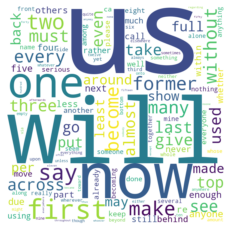

In [25]:
stop_text = ' '.join(flat_stop_words)
wordcloud = WordCloud(width=800, height=800, background_color='white',min_font_size=10).generate(stop_text)

# Display the word cloud
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
def convert_text(text):
    # Parse text with Spacy
    doc = nlp(text)
    
    # Lemmatize and remove stop words
    lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    
    # Join lemmas back into a string
    clean_text = ' '.join(lemmas)
    
    return clean_text

In [27]:
# nlp.Defaults.stop_words.remove('not')


In [28]:
df_simple.iloc[:,2]

0       georgia downs two russian warplanes as countri...
1       why wont america and nato help us if they wont...
2       remember that adorable 9yearold who sang at th...
3         us refuses israel weapons to attack iran report
4       all the experts admit that we should legalise ...
                              ...                        
1984    barclays and rbs shares suspended from trading...
1985    2500 scientists to australia if you want to sa...
1986                     explosion at airport in istanbul
1987    jamaica proposes marijuana dispensers for tour...
1988    a 117yearold woman in mexico city finally rece...
Name: Top1, Length: 1989, dtype: object

In [29]:
df_simple['short'] = df_simple.iloc[:,2].apply(convert_text)

In [30]:
df_simple

,Date,Label,Top1,short
0,2008-08-08,0,georgia downs two russian warplanes as countri...,georgia down russian warplane country brink war
1,2008-08-11,1,why wont america and nato help us if they wont...,will not america nato help will not help help ...
2,2008-08-12,0,remember that adorable 9yearold who sang at th...,remember adorable 9yearold sing open ceremony ...
3,2008-08-13,0,us refuses israel weapons to attack iran report,refuse israel weapon attack iran report
4,2008-08-14,1,all the experts admit that we should legalise ...,expert admit legalise drug
...,...,...,...,...
1984,2016-06-27,0,barclays and rbs shares suspended from trading...,barclay rbs share suspend trading tank 8
1985,2016-06-28,1,2500 scientists to australia if you want to sa...,2500 scientist australia want save great barri...
1986,2016-06-29,1,explosion at airport in istanbul,explosion airport istanbul
1987,2016-06-30,1,jamaica proposes marijuana dispensers for tour...,jamaica propose marijuana dispenser tourist ai...


In [31]:
#Most common words
all_words = []

for text in df_simple['short']:
    doc = nlp(text)
    #print(doc)
    words = [token.text for token in doc if not token.is_punct and not token.is_stop]
    #print(words)
    all_words.append(words)
    #print(all_words)


In [32]:
all_words

[['georgia', 'russian', 'warplane', 'country', 'brink', 'war'],
 ['america', 'nato', 'help', 'help', 'help', 'iraq'],
 ['remember', 'adorable', '9yearold', 'sing', 'open', 'ceremony', 'fake'],
 ['  ', 'refuse', 'israel', 'weapon', 'attack', 'iran', 'report'],
 ['expert', 'admit', 'legalise', 'drug'],
 ['mom',
  'miss',
  'gay',
  'man',
  'bad',
  's',
  '21yearold',
  'cheerleader',
  'd',
  'look'],
 ['afghan',
  'prison',
  'majority',
  'female',
  'prisoner',
  'serve',
  '20year',
  'sentence',
  'victim',
  'rape'],
 ['man',
  'arrest',
  'lock',
  'hour',
  'photo',
  'police',
  'van',
  'ignore',
  'entry',
  'sign'],
 ['elderly',
  'chinese',
  'woman',
  'sentence',
  'year',
  'reeducation',
  'labor',
  'seek',
  'permit',
  'demonstrate',
  'official',
  'olympic',
  'protest',
  'area'],
 ['british',
  'resident',
  'hold',
  'guantanamo',
  'bay',
  'win',
  'legal',
  'battle',
  'force',
  'foreign',
  'office',
  'reveal',
  'torture',
  'evidence'],
 ['syria',
  'r

In [33]:
from collections import Counter
from itertools import chain

# Flatten the list of lists
flat_words = list(chain(*all_words))

word_counts = Counter(flat_words)

top_10_words = word_counts.most_common(10)

Text(0, 0.5, 'Top 10 Words')

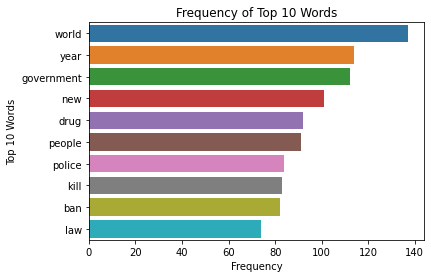

In [34]:
ax = sns.barplot(x=[w[1] for w in top_10_words], y=[w[0] for w in top_10_words])
ax.set_title("Frequency of Top 10 Words")
ax.set_xlabel("Frequency")
ax.set_ylabel("Top 10 Words")

In [35]:
[w[1] for w in top_10_words]

[137, 114, 112, 101, 92, 91, 84, 83, 82, 74]

- The most common words used in headlines of news articles are world, year, government, new, drug, people and police. Which makes sense as to why they would appear the most

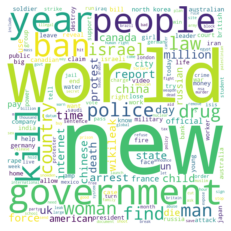

In [36]:
text = ' '.join(flat_words) #Need to make the list into a single string of all words

# Create the WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white',min_font_size=10).generate(text)

# Display the word cloud
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
#Part of Speech Tagging Counts
# Initialise some columns for feature's counts
df_simple['adj_count'] = 0
df_simple['adv_count'] = 0
df_simple['noun_count'] = 0
df_simple['num_count'] = 0
df_simple['pron_count'] = 0
df_simple['propn_count'] = 0
df_simple['verb_count'] = 0

In [38]:
# Define a function to count the POS tags and update the relevant columns in the DataFrame
def POS_count(row):
    doc = nlp(row['short'])
    for token in doc:
        if token.pos_ == 'ADJ':
            row['adj_count'] += 1
        if token.pos_ == 'ADV':
            row['adv_count'] += 1
        if token.pos_ == 'NOUN':
            row['noun_count'] += 1
        if token.pos_ == 'NUM':
            row['num_count'] += 1
        if token.pos_ == 'PRON':
            row['pron_count'] += 1
        if token.pos_ == 'PROPN':
            row['propn_count'] += 1
        if token.pos_ == 'VERB':
            row['verb_count'] += 1
        
    return row

# Apply the POS_count function to each row of the df
df_simple = df_simple.apply(POS_count, axis=1)

In [39]:
df_simple.head()

,Date,Label,Top1,short,adj_count,adv_count,noun_count,num_count,pron_count,propn_count,verb_count
0,2008-08-08,0,georgia downs two russian warplanes as countri...,georgia down russian warplane country brink war,0,0,2,0,0,3,1
1,2008-08-11,1,why wont america and nato help us if they wont...,will not america nato help will not help help ...,0,0,1,0,0,3,2
2,2008-08-12,0,remember that adorable 9yearold who sang at th...,remember adorable 9yearold sing open ceremony ...,3,0,1,1,0,0,2
3,2008-08-13,0,us refuses israel weapons to attack iran report,refuse israel weapon attack iran report,0,0,0,0,0,5,1
4,2008-08-14,1,all the experts admit that we should legalise ...,expert admit legalise drug,0,0,3,0,0,0,1


In [40]:
(df_simple.iloc[:,4]).value_counts()

0     585
1     569
2     439
3     202
4      88
5      67
6      29
7       6
8       3
11      1
Name: adj_count, dtype: int64

In [41]:
sum(df_simple.iloc[:,5])

428

Text(0, 0.5, 'Count')

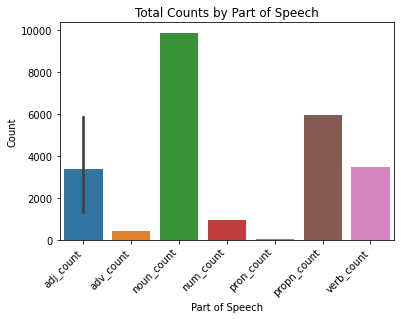

In [42]:
totals = df_simple.iloc[:, 4:].sum()
ax = sns.barplot(totals)

ax = sns.barplot(x=totals.index, y=totals.values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Set the title and axis labels
ax.set_title("Total Counts by Part of Speech")
ax.set_xlabel("Part of Speech")
ax.set_ylabel("Count")

Insights:
- There is a significant amount of nouns in headlines of news articles. Makes sense as articles are generally about something. 
- Proper Nouns are the second highest count, again as news articles generally are focused on someone/something
- The nouns will play an important role in sentiment analysis, as if something related to a stock gets mentioned in the headline it will have a large impact on how people see that stock

## Split

In [43]:
df_simple.head()

,Date,Label,Top1,short,adj_count,adv_count,noun_count,num_count,pron_count,propn_count,verb_count
0,2008-08-08,0,georgia downs two russian warplanes as countri...,georgia down russian warplane country brink war,0,0,2,0,0,3,1
1,2008-08-11,1,why wont america and nato help us if they wont...,will not america nato help will not help help ...,0,0,1,0,0,3,2
2,2008-08-12,0,remember that adorable 9yearold who sang at th...,remember adorable 9yearold sing open ceremony ...,3,0,1,1,0,0,2
3,2008-08-13,0,us refuses israel weapons to attack iran report,refuse israel weapon attack iran report,0,0,0,0,0,5,1
4,2008-08-14,1,all the experts admit that we should legalise ...,expert admit legalise drug,0,0,3,0,0,0,1


In [44]:
df_simple.columns

Index(['Date', 'Label', 'Top1', 'short', 'adj_count', 'adv_count',
       'noun_count', 'num_count', 'pron_count', 'propn_count', 'verb_count'],
      dtype='object')

In [45]:
## ANSWER
## split the dataset
X = df_simple['short']
y = df_simple['Label']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Test

In [46]:
X_new = df_simple[['adj_count', 'adv_count','noun_count', 'num_count', 'pron_count', 'propn_count', 'verb_count']]
y_new = df_simple['Label']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.2, random_state = 42)

In [47]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   adj_count    1989 non-null   int64
 1   adv_count    1989 non-null   int64
 2   noun_count   1989 non-null   int64
 3   num_count    1989 non-null   int64
 4   pron_count   1989 non-null   int64
 5   propn_count  1989 non-null   int64
 6   verb_count   1989 non-null   int64
dtypes: int64(7)
memory usage: 108.9 KB


In [48]:
X_new.shape

(1989, 7)

In [49]:
y_train.value_counts()

1    838
0    753
Name: Label, dtype: int64

In [50]:
X_test

1173    ontario put end coalburne power plant verge in...
1650                   thousand moscow chant russia putin
843     south korean coastguard stab death chinese fis...
70      haitian desperate food mother wait newborn inf...
755     nhs developed world efficient health system sa...
                              ...                        
905     indian govt use special power slash cancer dru...
261     effective today mexico decriminalizes possessi...
514     s traffic jam china s 60 mile long go 10 day week
1721    medical marijuana legal form supreme court rul...
240     new jersey mayor rabbi arrest involvement inte...
Name: short, Length: 398, dtype: object

In [51]:
y_test.value_counts()

1    227
0    171
Name: Label, dtype: int64

## Feature Engineering

### Count Vectors as Features

In [52]:
# create a count vectorizer object
count_vect = CountVectorizer(token_pattern = r'\w{1,}') #Get words

# Learn a vocabulary dictionary of all tokens in the raw documents
count_vect.fit(X_train)

# Transform documents to document-term matrix.
X_train_count = count_vect.transform(X_train)
X_test_count = count_vect.transform(X_test)

In [53]:
# X_train_count.toarray().shape #PCA to reduce dimensions

### TF-IDF Vectors as features

In [54]:
%%time
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer = 'word',
                             token_pattern = r'\w{1,}',
                             max_features = 5000)
print(tfidf_vect)

tfidf_vect.fit(X_train)
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf  = tfidf_vect.transform(X_test)

TfidfVectorizer(max_features=5000, token_pattern='\\w{1,}')
CPU times: total: 62.5 ms
Wall time: 62 ms


In [55]:
%%time
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer = 'word',
                                   token_pattern = r'\w{1,}',
                                   ngram_range = (2, 3),
                                   max_features = 5000)
print(tfidf_vect_ngram)

tfidf_vect_ngram.fit(X_train)
X_train_tfidf_ngram = tfidf_vect_ngram.transform(X_train)
X_test_tfidf_ngram  = tfidf_vect_ngram.transform(X_test)

TfidfVectorizer(max_features=5000, ngram_range=(2, 3), token_pattern='\\w{1,}')
CPU times: total: 141 ms
Wall time: 148 ms


In [56]:
%%time
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer = 'char',
                                         token_pattern = r'\w{1,}',
                                         ngram_range = (2, 3),
                                         max_features = 5000)
print(tfidf_vect_ngram_chars)

tfidf_vect_ngram_chars.fit(X_train)
X_train_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(X_train)
X_test_tfidf_ngram_chars  = tfidf_vect_ngram_chars.transform(X_test)

TfidfVectorizer(analyzer='char', max_features=5000, ngram_range=(2, 3),
                token_pattern='\\w{1,}')
CPU times: total: 359 ms
Wall time: 350 ms


In [57]:
from sklearn.decomposition import PCA

In [58]:
X_train_new.shape

(1591, 7)

In [59]:
X_train_new

,adj_count,adv_count,noun_count,num_count,pron_count,propn_count,verb_count
807,2,0,3,0,0,0,2
1939,0,0,2,0,0,2,1
416,1,0,4,0,0,0,1
1273,5,0,14,0,0,3,3
543,3,0,4,0,0,1,1
...,...,...,...,...,...,...,...
1130,2,0,9,0,0,5,4
1294,2,0,6,0,0,6,3
860,1,0,1,0,0,3,1
1459,1,0,4,0,0,1,1


In [60]:
(X_train_tfidf_ngram.toarray())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
(X_train_tfidf_ngram.toarray()).shape

(1591, 5000)

In [62]:
X_train_tfidf_new = pd.concat([pd.DataFrame(X_train_tfidf_ngram.toarray()), X_train_new], axis = 1, ignore_index= True)

In [63]:
X_train_tfidf_new

,0,1,2,3,4,5,6,7,8,9,...,4997,4998,4999,5000,5001,5002,5003,5004,5005,5006
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,5.0,0.0
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,0.0,5.0,1.0,0.0,1.0,2.0
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,12.0,1.0,0.0,3.0,2.0


In [64]:
X_train_tfidf_new = X_train_tfidf_new.iloc[:-308]

In [65]:
X_train_tfidf_new

,0,1,2,3,4,5,6,7,8,9,...,4997,4998,4999,5000,5001,5002,5003,5004,5005,5006
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,1.0
1587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,6.0,4.0
1588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0


In [66]:
#X_train_tfidf_new.columns = X_train_tfidf_new.columns.astype(str)

In [67]:
X_train_tfidf_new.dtypes.unique()

array([dtype('float64')], dtype=object)

In [68]:
X_train_tfidf_new.isna().sum()

0         0
1         0
2         0
3         0
4         0
       ... 
5002    308
5003    308
5004    308
5005    308
5006    308
Length: 5007, dtype: int64

In [69]:
X_train_tfidf_ngram.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
# pca = PCA(n_components= 0.95)
# X_pca = pca.fit_transform(X_train_tfidf_new)

In [71]:
# X_pca.shape

In [72]:
# X_pca_test = pca.transform(X_train_tfidf_new)

## Modelling

In [73]:
## helper function

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    return accuracy_score(y_test,predictions)

In [74]:
## Helper function - Training vs Testing Accuracy
def train_vs_test(classifier, X_train, y_train, X_test, y_test):
    
    train_acc, test_acc = [],[]

    for i in range(1,11):
        
        # fit the training dataset on the classifier
        classifier.fit(X_train, y_train)

        train_acc.append(classifier.score(X_train, y_train))
        test_acc.append(classifier.score(X_test, y_test))
    
    # Plot the training and testing accuracy
    plt.plot(range(1, 11), train_acc, label='Training Accuracy')
    plt.plot(range(1, 11), test_acc, label='Testing Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    avg_acc = sum(test_acc) / len(test_acc)
    return avg_acc, train_acc, test_acc

In [75]:
# Helper Function - Confusion Matrix
def cm(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

    return y_pred



In [76]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Count Vectors',
                                  'WordLevel TF-IDF',
                                  'N-Gram Vectors',
                                  'CharLevel Vectors'])

In [77]:
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
reports_df = pd.DataFrame(columns=['Model', 'Report'])

### Linear Classifier (Logistic Regression)

In [79]:
%%time
# Logistic Reg on Count Vectors
accuracy1 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_train_count, y_train, X_test_count)
print('LR, Count Vectors    : %.4f\n' % accuracy1)

LR, Count Vectors    : 0.4648

CPU times: total: 62.5 ms
Wall time: 33 ms


In [80]:
#train_model(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_pca, y_train, X_pca_test)

In [81]:
#train_vs_test(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_pca, y_train, X_pca_test, y_test)

In [82]:
y_pred = cm(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_train_count, y_train, X_test_count, y_test)

[[ 79  92]
 [121 106]]
[['TN' 'FP']
 ['FN' 'TP']]


In [83]:
lr_count_rep = classification_report(y_test, y_pred,output_dict=True)

In [84]:
print(lr_count_rep)

{'0': {'precision': 0.395, 'recall': 0.4619883040935672, 'f1-score': 0.42587601078167114, 'support': 171}, '1': {'precision': 0.5353535353535354, 'recall': 0.4669603524229075, 'f1-score': 0.4988235294117648, 'support': 227}, 'accuracy': 0.4648241206030151, 'macro avg': {'precision': 0.4651767676767677, 'recall': 0.46447432825823737, 'f1-score': 0.46234977009671796, 'support': 398}, 'weighted avg': {'precision': 0.4750508857418405, 'recall': 0.4648241206030151, 'f1-score': 0.4674817563320009, 'support': 398}}


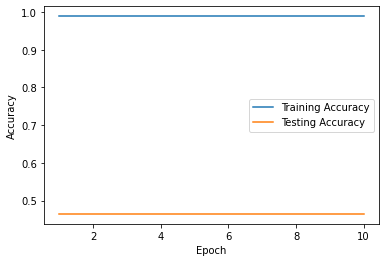

CPU times: total: 406 ms
Wall time: 414 ms


(0.4648241206030151,
 [0.988686360779384,
  0.988686360779384,
  0.988686360779384,
  0.988686360779384,
  0.988686360779384,
  0.988686360779384,
  0.988686360779384,
  0.988686360779384,
  0.988686360779384,
  0.988686360779384],
 [0.4648241206030151,
  0.4648241206030151,
  0.4648241206030151,
  0.4648241206030151,
  0.4648241206030151,
  0.4648241206030151,
  0.4648241206030151,
  0.4648241206030151,
  0.4648241206030151,
  0.4648241206030151])

In [85]:
%%time
# Logistic Reg on Count Vectors
train_vs_test(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_train_count, y_train, X_test_count, y_test)


In [86]:
%%time
# LR on Word Level TF IDF Vectors
accuracy2 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf)
print('LR, WordLevel TF-IDF : %.4f\n' % accuracy2)

LR, WordLevel TF-IDF : 0.4724

CPU times: total: 31.2 ms
Wall time: 30 ms


In [87]:
y_pred = cm(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)

[[ 62 109]
 [101 126]]
[['TN' 'FP']
 ['FN' 'TP']]


In [88]:
lr_tfidf_rep = classification_report(y_test, y_pred,output_dict=True)
print(lr_tfidf_rep)

{'0': {'precision': 0.3803680981595092, 'recall': 0.36257309941520466, 'f1-score': 0.37125748502994016, 'support': 171}, '1': {'precision': 0.5361702127659574, 'recall': 0.5550660792951542, 'f1-score': 0.5454545454545454, 'support': 227}, 'accuracy': 0.4723618090452261, 'macro avg': {'precision': 0.45826915546273334, 'recall': 0.4588195893551794, 'f1-score': 0.4583560152422428, 'support': 398}, 'weighted avg': {'precision': 0.4692301082491166, 'recall': 0.4723618090452261, 'f1-score': 0.47061108481985325, 'support': 398}}


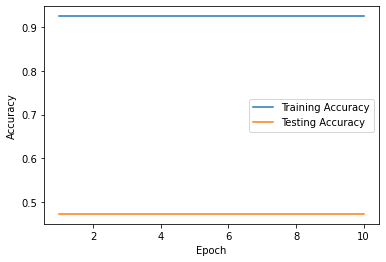

(0.47236180904522607,
 [0.9252042740414833,
  0.9252042740414833,
  0.9252042740414833,
  0.9252042740414833,
  0.9252042740414833,
  0.9252042740414833,
  0.9252042740414833,
  0.9252042740414833,
  0.9252042740414833,
  0.9252042740414833],
 [0.4723618090452261,
  0.4723618090452261,
  0.4723618090452261,
  0.4723618090452261,
  0.4723618090452261,
  0.4723618090452261,
  0.4723618090452261,
  0.4723618090452261,
  0.4723618090452261,
  0.4723618090452261])

In [89]:
train_vs_test(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)


In [90]:
%%time
# LR on Ngram Level TF IDF Vectors
accuracy3 = train_model(LogisticRegression(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('LR, N-Gram Vectors   : %.4f\n' % accuracy3)

LR, N-Gram Vectors   : 0.5503

CPU times: total: 46.9 ms
Wall time: 30 ms


In [91]:
y_pred = cm(LogisticRegression(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram, y_test)


[[ 26 145]
 [ 34 193]]
[['TN' 'FP']
 ['FN' 'TP']]


In [92]:
lr_ngram_rep = classification_report(y_test, y_pred,output_dict=True)
print(lr_ngram_rep)

{'0': {'precision': 0.43333333333333335, 'recall': 0.15204678362573099, 'f1-score': 0.2251082251082251, 'support': 171}, '1': {'precision': 0.5710059171597633, 'recall': 0.8502202643171806, 'f1-score': 0.6831858407079645, 'support': 227}, 'accuracy': 0.550251256281407, 'macro avg': {'precision': 0.5021696252465484, 'recall': 0.5011335239714558, 'f1-score': 0.45414703290809477, 'support': 398}, 'weighted avg': {'precision': 0.511855133656448, 'recall': 0.550251256281407, 'f1-score': 0.4863735988296845, 'support': 398}}


In [93]:

X_train_tfidf_ngram = tfidf_vect_ngram.fit_transform(X_train)
X_test_tfidf_ngram = tfidf_vect_ngram.transform(X_test)


clf = LogisticRegression()
clf.fit(X_train_tfidf_ngram, y_train)

# Get the accuracy of the model on the testing set
accuracy = clf.score(X_test_tfidf_ngram, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.550251256281407


In [94]:
clf.score(X_train_tfidf_ngram, y_train)

0.9182903834066625

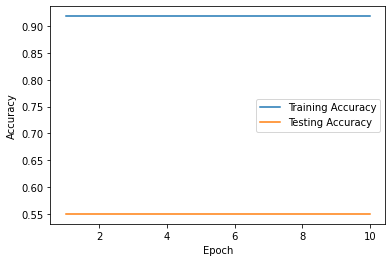

(0.550251256281407,
 [0.9182903834066625,
  0.9182903834066625,
  0.9182903834066625,
  0.9182903834066625,
  0.9182903834066625,
  0.9182903834066625,
  0.9182903834066625,
  0.9182903834066625,
  0.9182903834066625,
  0.9182903834066625],
 [0.550251256281407,
  0.550251256281407,
  0.550251256281407,
  0.550251256281407,
  0.550251256281407,
  0.550251256281407,
  0.550251256281407,
  0.550251256281407,
  0.550251256281407,
  0.550251256281407])

In [95]:
train_vs_test(LogisticRegression(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram, y_test)


In [96]:
%%time
# # LR on Character Level TF IDF Vectors
accuracy4 = train_model(LogisticRegression(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('LR, CharLevel Vectors: %.4f\n' % accuracy4)

LR, CharLevel Vectors: 0.4874

CPU times: total: 31.2 ms
Wall time: 34 ms


In [97]:
y_pred = cm(LogisticRegression(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars, y_test)


[[ 60 111]
 [ 93 134]]
[['TN' 'FP']
 ['FN' 'TP']]


In [98]:
lr_ngramchars_rep = classification_report(y_test, y_pred,output_dict=True)
print(lr_ngramchars_rep)

{'0': {'precision': 0.39215686274509803, 'recall': 0.3508771929824561, 'f1-score': 0.3703703703703704, 'support': 171}, '1': {'precision': 0.5469387755102041, 'recall': 0.5903083700440529, 'f1-score': 0.5677966101694916, 'support': 227}, 'accuracy': 0.48743718592964824, 'macro avg': {'precision': 0.4695478191276511, 'recall': 0.4705927815132545, 'f1-score': 0.469083490269931, 'support': 398}, 'weighted avg': {'precision': 0.4804369989201711, 'recall': 0.48743718592964824, 'f1-score': 0.48297277347187917, 'support': 398}}


In [99]:
results.loc['LogisticRegression'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3,
    'CharLevel Vectors': accuracy4}

In [100]:
results

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors,CharLevel Vectors
LogisticRegression,0.464824,0.472362,0.550251,0.487437


### Naive Bayes Classifier

In [101]:
from sklearn.naive_bayes import MultinomialNB

In [102]:
%%time
# Naive Bayes on Count Vectors
accuracy1 = train_model(MultinomialNB(), X_train_count, y_train, X_test_count)
print('NB, Count Vectors    : %.4f\n' % accuracy1)

NB, Count Vectors    : 0.4724

CPU times: total: 0 ns
Wall time: 3 ms


In [103]:
y_pred = cm(MultinomialNB(), X_train_count, y_train, X_test_count, y_test)

[[ 86  85]
 [125 102]]
[['TN' 'FP']
 ['FN' 'TP']]


In [104]:
nb_count_rep = classification_report(y_test, y_pred,output_dict=True)
print(nb_count_rep)

{'0': {'precision': 0.4075829383886256, 'recall': 0.5029239766081871, 'f1-score': 0.450261780104712, 'support': 171}, '1': {'precision': 0.5454545454545454, 'recall': 0.44933920704845814, 'f1-score': 0.4927536231884058, 'support': 227}, 'accuracy': 0.4723618090452261, 'macro avg': {'precision': 0.4765187419215855, 'recall': 0.47613159182832265, 'f1-score': 0.4715077016465589, 'support': 398}, 'weighted avg': {'precision': 0.48621825196642404, 'recall': 0.4723618090452261, 'f1-score': 0.4744970775418942, 'support': 398}}


In [105]:
%%time
# Naive Bayes on Word Level TF IDF Vectors
accuracy2 = train_model(MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf)
print('NB, WordLevel TF-IDF : %.4f\n' % accuracy2)

NB, WordLevel TF-IDF : 0.4874

CPU times: total: 0 ns
Wall time: 4 ms


In [106]:
y_pred = cm(MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf,y_test)


[[ 61 110]
 [ 94 133]]
[['TN' 'FP']
 ['FN' 'TP']]


In [107]:
nb_tfidf_rep = classification_report(y_test, y_pred,output_dict=True)
print(nb_tfidf_rep)

{'0': {'precision': 0.3935483870967742, 'recall': 0.3567251461988304, 'f1-score': 0.3742331288343559, 'support': 171}, '1': {'precision': 0.5473251028806584, 'recall': 0.5859030837004405, 'f1-score': 0.5659574468085106, 'support': 227}, 'accuracy': 0.48743718592964824, 'macro avg': {'precision': 0.4704367449887163, 'recall': 0.4713141149496355, 'f1-score': 0.4700952878214332, 'support': 398}, 'weighted avg': {'precision': 0.481255207405673, 'recall': 0.48743718592964824, 'f1-score': 0.48358343079448934, 'support': 398}}


In [108]:
%%time
# Naive Bayes on Ngram Level TF IDF Vectors
accuracy3 = train_model(MultinomialNB(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('NB, N-Gram Vectors   : %.4f\n' % accuracy3)

NB, N-Gram Vectors   : 0.5553

CPU times: total: 0 ns
Wall time: 4 ms


In [109]:
y_pred = cm(MultinomialNB(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram, y_test)


[[ 30 141]
 [ 36 191]]
[['TN' 'FP']
 ['FN' 'TP']]


In [110]:
nb_tfidf_ngram_rep = classification_report(y_test, y_pred,output_dict=True)
print(nb_tfidf_ngram_rep)

{'0': {'precision': 0.45454545454545453, 'recall': 0.17543859649122806, 'f1-score': 0.25316455696202533, 'support': 171}, '1': {'precision': 0.5753012048192772, 'recall': 0.8414096916299559, 'f1-score': 0.6833631484794275, 'support': 227}, 'accuracy': 0.5552763819095478, 'macro avg': {'precision': 0.5149233296823659, 'recall': 0.508424144060592, 'f1-score': 0.4682638527207264, 'support': 398}, 'weighted avg': {'precision': 0.5234187090986147, 'recall': 0.5552763819095478, 'f1-score': 0.49852908026466425, 'support': 398}}


In [111]:
%%time
# # Naive Bayes on Character Level TF IDF Vectors
accuracy4 = train_model(MultinomialNB(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('NB, CharLevel Vectors: %.4f\n' % accuracy4)

NB, CharLevel Vectors: 0.4849

CPU times: total: 15.6 ms
Wall time: 6 ms


In [112]:
y_pred = cm(MultinomialNB(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars, y_test)


[[ 38 133]
 [ 72 155]]
[['TN' 'FP']
 ['FN' 'TP']]


In [113]:
nb_tfidf_ngramchar_rep = classification_report(y_test, y_pred,output_dict=True)
print(nb_tfidf_ngramchar_rep)

{'0': {'precision': 0.34545454545454546, 'recall': 0.2222222222222222, 'f1-score': 0.27046263345195726, 'support': 171}, '1': {'precision': 0.5381944444444444, 'recall': 0.6828193832599119, 'f1-score': 0.6019417475728155, 'support': 227}, 'accuracy': 0.4849246231155779, 'macro avg': {'precision': 0.44182449494949494, 'recall': 0.45252080274106704, 'f1-score': 0.4362021905123864, 'support': 398}, 'weighted avg': {'precision': 0.4553840858332064, 'recall': 0.4849246231155779, 'f1-score': 0.45952232919425584, 'support': 398}}


In [114]:
results.loc['Naïve Bayes'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3,
    'CharLevel Vectors': accuracy4}

In [115]:
results

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors,CharLevel Vectors
LogisticRegression,0.464824,0.472362,0.550251,0.487437
Naïve Bayes,0.472362,0.487437,0.555276,0.484925


### SVM Classifier

In [116]:
%%time
# SVM on Count Vectors
accuracy1 = train_model(LinearSVC(), X_train_count, y_train, X_test_count)
print('SVM, Count Vectors    : %.4f\n' % accuracy1)

SVM, Count Vectors    : 0.4271

CPU times: total: 15.6 ms
Wall time: 11 ms


In [117]:
y_pred = cm(LinearSVC(), X_train_count, y_train, X_test_count, y_test)


[[ 75  96]
 [132  95]]
[['TN' 'FP']
 ['FN' 'TP']]


In [118]:
svm_count_rep = classification_report(y_test, y_pred,output_dict=True)
print(svm_count_rep)

{'0': {'precision': 0.36231884057971014, 'recall': 0.43859649122807015, 'f1-score': 0.3968253968253968, 'support': 171}, '1': {'precision': 0.4973821989528796, 'recall': 0.4185022026431718, 'f1-score': 0.45454545454545453, 'support': 227}, 'accuracy': 0.4271356783919598, 'macro avg': {'precision': 0.42985051976629485, 'recall': 0.42854934693562097, 'f1-score': 0.42568542568542567, 'support': 398}, 'weighted avg': {'precision': 0.4393524645764676, 'recall': 0.4271356783919598, 'f1-score': 0.42974613326372113, 'support': 398}}


In [119]:
# # Convert text to features using CountVectorizer
# vectorizer = CountVectorizer()
# X_train_count = vectorizer.fit_transform(X_train)
# X_test_count = vectorizer.transform(X_test)

# # Train a Linear SVC model
# clf = LinearSVC()
# clf.fit(X_train_count, y_train)

# # Get the accuracy of the model on the testing set
# accuracy = clf.score(X_test_count, y_test)
# print("Accuracy:", accuracy)

In [120]:
# clf.score(X_train_count, y_train)

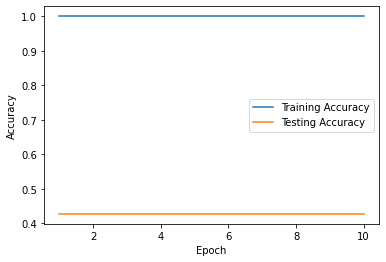

(0.42713567839195987,
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.4271356783919598,
  0.4271356783919598,
  0.4271356783919598,
  0.4271356783919598,
  0.4271356783919598,
  0.4271356783919598,
  0.4271356783919598,
  0.4271356783919598,
  0.4271356783919598,
  0.4271356783919598])

In [121]:
train_vs_test(LinearSVC(), X_train_count, y_train, X_test_count, y_test)


In [122]:
%%time
# SVM on Word Level TF IDF Vectors
accuracy2 = train_model(LinearSVC(), X_train_tfidf, y_train, X_test_tfidf)
print('SVM, WordLevel TF-IDF : %.4f\n' % accuracy2)

SVM, WordLevel TF-IDF : 0.4598

CPU times: total: 0 ns
Wall time: 7 ms


In [123]:
y_pred = cm(LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)


[[ 80  91]
 [124 103]]
[['TN' 'FP']
 ['FN' 'TP']]


In [124]:
svm_tfidf_rep = classification_report(y_test, y_pred,output_dict=True)
print(svm_tfidf_rep)

{'0': {'precision': 0.39215686274509803, 'recall': 0.4678362573099415, 'f1-score': 0.4266666666666667, 'support': 171}, '1': {'precision': 0.5309278350515464, 'recall': 0.45374449339207046, 'f1-score': 0.48931116389548696, 'support': 227}, 'accuracy': 0.45979899497487436, 'macro avg': {'precision': 0.46154234889832224, 'recall': 0.460790375351006, 'f1-score': 0.4579889152810768, 'support': 398}, 'weighted avg': {'precision': 0.47130513086963016, 'recall': 0.45979899497487436, 'f1-score': 0.46239606583988824, 'support': 398}}


In [125]:
%%time
# SVM on Ngram Level TF IDF Vectors
accuracy3 = train_model(LinearSVC(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('SVM, N-Gram Vectors   : %.4f\n' % accuracy3)

SVM, N-Gram Vectors   : 0.5553

CPU times: total: 0 ns
Wall time: 6 ms


In [126]:
y_pred = cm(LinearSVC(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram, y_test)


[[ 33 138]
 [ 39 188]]
[['TN' 'FP']
 ['FN' 'TP']]


In [127]:
svm_tfidf_ngram_rep = classification_report(y_test, y_pred,output_dict=True)
print(svm_tfidf_ngram_rep)

{'0': {'precision': 0.4583333333333333, 'recall': 0.19298245614035087, 'f1-score': 0.2716049382716049, 'support': 171}, '1': {'precision': 0.5766871165644172, 'recall': 0.8281938325991189, 'f1-score': 0.6799276672694394, 'support': 227}, 'accuracy': 0.5552763819095478, 'macro avg': {'precision': 0.5175102249488752, 'recall': 0.5105881443697349, 'f1-score': 0.4757663027705222, 'support': 398}, 'weighted avg': {'precision': 0.5258366217591023, 'recall': 0.5552763819095478, 'f1-score': 0.5044925249110734, 'support': 398}}


In [128]:
%%time
#SVM on Character Level TF IDF Vectors
accuracy4 = train_model(LinearSVC(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('SVM, CharLevel Vectors: %.4f\n' % accuracy4)

SVM, CharLevel Vectors: 0.4698

CPU times: total: 62.5 ms
Wall time: 36 ms


In [129]:
y_pred = cm(LinearSVC(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars, y_test)


[[ 68 103]
 [108 119]]
[['TN' 'FP']
 ['FN' 'TP']]


In [130]:
svm_tfidf_ngram_chars_rep = classification_report(y_test, y_pred,output_dict=True)
print(svm_tfidf_ngram_chars_rep)

{'0': {'precision': 0.38636363636363635, 'recall': 0.39766081871345027, 'f1-score': 0.3919308357348703, 'support': 171}, '1': {'precision': 0.536036036036036, 'recall': 0.5242290748898678, 'f1-score': 0.5300668151447661, 'support': 227}, 'accuracy': 0.46984924623115576, 'macro avg': {'precision': 0.4611998361998362, 'recall': 0.46094494680165904, 'f1-score': 0.4609988254398182, 'support': 398}, 'weighted avg': {'precision': 0.47172955275970346, 'recall': 0.46984924623115576, 'f1-score': 0.47071693454403196, 'support': 398}}


In [131]:
results.loc['SVM'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3,
    'CharLevel Vectors': accuracy4}

In [132]:
results

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors,CharLevel Vectors
LogisticRegression,0.464824,0.472362,0.550251,0.487437
Naïve Bayes,0.472362,0.487437,0.555276,0.484925
SVM,0.427136,0.459799,0.555276,0.469849


### Random Forest

In [133]:
%%time
# RF on Count Vectors
accuracy1 = train_model(RandomForestClassifier(n_estimators=100), X_train_count, y_train, X_test_count)
print('RF, Count Vectors    : %.4f\n' % accuracy1)

RF, Count Vectors    : 0.5302

CPU times: total: 3.25 s
Wall time: 3.3 s


In [134]:
y_pred = cm(RandomForestClassifier(n_estimators=100), X_train_count, y_train, X_test_count, y_test)


[[ 51 120]
 [ 75 152]]
[['TN' 'FP']
 ['FN' 'TP']]


In [135]:
RF_count_rep = classification_report(y_test, y_pred,output_dict=True)
print(RF_count_rep)

{'0': {'precision': 0.40476190476190477, 'recall': 0.2982456140350877, 'f1-score': 0.3434343434343434, 'support': 171}, '1': {'precision': 0.5588235294117647, 'recall': 0.6696035242290749, 'f1-score': 0.6092184368737474, 'support': 227}, 'accuracy': 0.5100502512562815, 'macro avg': {'precision': 0.48179271708683474, 'recall': 0.48392456913208126, 'f1-score': 0.47632639015404543, 'support': 398}, 'weighted avg': {'precision': 0.4926312233436088, 'recall': 0.5100502512562815, 'f1-score': 0.4950247685869683, 'support': 398}}


In [136]:
%%time
# RF on Word Level TF IDF Vectors
accuracy2 = train_model(RandomForestClassifier(n_estimators=100), X_train_tfidf, y_train, X_test_tfidf)
print('RF, WordLevel TF-IDF : %.4f\n' % accuracy2)

RF, WordLevel TF-IDF : 0.5075

CPU times: total: 2.78 s
Wall time: 2.83 s


In [137]:
y_pred = cm(RandomForestClassifier(n_estimators=100), X_train_tfidf, y_train, X_test_tfidf, y_test)


[[ 56 115]
 [ 77 150]]
[['TN' 'FP']
 ['FN' 'TP']]


In [138]:
RF_tfidf_rep = classification_report(y_test, y_pred,output_dict=True)
print(RF_tfidf_rep)

{'0': {'precision': 0.42105263157894735, 'recall': 0.32748538011695905, 'f1-score': 0.3684210526315789, 'support': 171}, '1': {'precision': 0.5660377358490566, 'recall': 0.6607929515418502, 'f1-score': 0.6097560975609756, 'support': 227}, 'accuracy': 0.5175879396984925, 'macro avg': {'precision': 0.49354518371400197, 'recall': 0.49413916582940465, 'f1-score': 0.48908857509627723, 'support': 398}, 'weighted avg': {'precision': 0.5037451407983313, 'recall': 0.5175879396984925, 'f1-score': 0.5060669199656821, 'support': 398}}


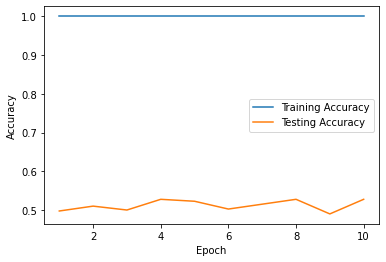

(0.5120603015075377,
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.49748743718592964,
  0.5100502512562815,
  0.5,
  0.5276381909547738,
  0.5226130653266332,
  0.5025125628140703,
  0.5150753768844221,
  0.5276381909547738,
  0.4899497487437186,
  0.5276381909547738])

In [139]:
train_vs_test(RandomForestClassifier(n_estimators=100), X_train_tfidf, y_train, X_test_tfidf, y_test)


In [140]:
%%time
# RF on Ngram Level TF IDF Vectors
accuracy3 = train_model(RandomForestClassifier(n_estimators=100), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('RF, N-Gram Vectors   : %.4f\n' % accuracy3)

RF, N-Gram Vectors   : 0.5653

CPU times: total: 3.02 s
Wall time: 3.05 s


In [141]:
y_pred = cm(RandomForestClassifier(n_estimators=100), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram, y_test)


[[ 28 143]
 [ 34 193]]
[['TN' 'FP']
 ['FN' 'TP']]


In [142]:
RF_tfidf_ngram_rep = classification_report(y_test, y_pred,output_dict=True)
print(RF_tfidf_ngram_rep)

{'0': {'precision': 0.45161290322580644, 'recall': 0.16374269005847952, 'f1-score': 0.24034334763948492, 'support': 171}, '1': {'precision': 0.5744047619047619, 'recall': 0.8502202643171806, 'f1-score': 0.6856127886323268, 'support': 227}, 'accuracy': 0.5552763819095478, 'macro avg': {'precision': 0.5130088325652842, 'recall': 0.50698147718783, 'f1-score': 0.46297806813590586, 'support': 398}, 'weighted avg': {'precision': 0.5216474557889292, 'recall': 0.5552763819095478, 'f1-score': 0.49430355644696006, 'support': 398}}


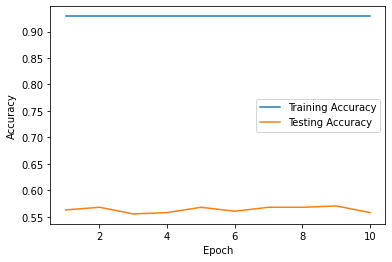

(0.5635678391959799,
 [0.928975487115022,
  0.928975487115022,
  0.928975487115022,
  0.928975487115022,
  0.928975487115022,
  0.928975487115022,
  0.928975487115022,
  0.928975487115022,
  0.928975487115022,
  0.928975487115022],
 [0.5628140703517588,
  0.5678391959798995,
  0.5552763819095478,
  0.5577889447236181,
  0.5678391959798995,
  0.5603015075376885,
  0.5678391959798995,
  0.5678391959798995,
  0.5703517587939698,
  0.5577889447236181])

In [143]:
train_vs_test(RandomForestClassifier(n_estimators=100), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram, y_test)


In [144]:
%%time
#RF on Character Level TF IDF Vectors
accuracy4 = train_model(RandomForestClassifier(n_estimators=100), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('RF, CharLevel Vectors: %.4f\n' % accuracy4)

RF, CharLevel Vectors: 0.4874

CPU times: total: 2.84 s
Wall time: 2.87 s


In [145]:
y_pred = cm(RandomForestClassifier(n_estimators=100), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars, y_test)


[[ 57 114]
 [ 96 131]]
[['TN' 'FP']
 ['FN' 'TP']]


In [146]:
RF_tfidf_ngram_char_rep = classification_report(y_test, y_pred,output_dict=True)
print(RF_tfidf_ngram_char_rep)

{'0': {'precision': 0.37254901960784315, 'recall': 0.3333333333333333, 'f1-score': 0.3518518518518519, 'support': 171}, '1': {'precision': 0.5346938775510204, 'recall': 0.5770925110132159, 'f1-score': 0.5550847457627118, 'support': 227}, 'accuracy': 0.4723618090452261, 'macro avg': {'precision': 0.45362144857943176, 'recall': 0.4552129221732746, 'f1-score': 0.4534682988072819, 'support': 398}, 'weighted avg': {'precision': 0.46502862451513266, 'recall': 0.4723618090452261, 'f1-score': 0.46776609033869915, 'support': 398}}


In [147]:
results.loc['RF'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3,
    'CharLevel Vectors': accuracy4}

In [148]:
results

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors,CharLevel Vectors
LogisticRegression,0.464824,0.472362,0.550251,0.487437
Naïve Bayes,0.472362,0.487437,0.555276,0.484925
SVM,0.427136,0.459799,0.555276,0.469849
RF,0.530151,0.507538,0.565327,0.487437


### Boosting

- Combine multiple weak learners

In [149]:
%%time
# Boost on Count Vectors
accuracy1 = train_model(GradientBoostingClassifier(n_estimators=100), X_train_count, y_train, X_test_count)
print('Boost, Count Vectors    : %.4f\n' % accuracy1)

Boost, Count Vectors    : 0.5201

CPU times: total: 2.06 s
Wall time: 2.08 s


In [150]:
y_pred = cm(GradientBoostingClassifier(n_estimators=100), X_train_count, y_train, X_test_count, y_test)


[[ 35 136]
 [ 48 179]]
[['TN' 'FP']
 ['FN' 'TP']]


In [151]:
GB_count_rep = classification_report(y_test, y_pred,output_dict=True)
print(GB_count_rep)

{'0': {'precision': 0.42168674698795183, 'recall': 0.2046783625730994, 'f1-score': 0.2755905511811024, 'support': 171}, '1': {'precision': 0.5682539682539682, 'recall': 0.788546255506608, 'f1-score': 0.6605166051660517, 'support': 227}, 'accuracy': 0.5376884422110553, 'macro avg': {'precision': 0.49497035762096003, 'recall': 0.49661230903985365, 'f1-score': 0.46805357817357707, 'support': 398}, 'weighted avg': {'precision': 0.5052816194185693, 'recall': 0.5376884422110553, 'f1-score': 0.49513380307704086, 'support': 398}}


In [152]:
%%time
# Boost on Word Level TF IDF Vectors
accuracy2 = train_model(GradientBoostingClassifier(n_estimators=100), X_train_tfidf, y_train, X_test_tfidf)
print('Boost, WordLevel TF-IDF : %.4f\n' % accuracy2)

Boost, WordLevel TF-IDF : 0.5226

CPU times: total: 2.31 s
Wall time: 2.32 s


In [153]:
y_pred = cm(GradientBoostingClassifier(n_estimators=100), X_train_tfidf, y_train, X_test_tfidf, y_test)


[[ 52 119]
 [ 66 161]]
[['TN' 'FP']
 ['FN' 'TP']]


In [154]:
GB_tfidf_rep = classification_report(y_test, y_pred,output_dict=True)
print(GB_tfidf_rep)

{'0': {'precision': 0.4406779661016949, 'recall': 0.30409356725146197, 'f1-score': 0.35986159169550175, 'support': 171}, '1': {'precision': 0.575, 'recall': 0.7092511013215859, 'f1-score': 0.6351084812623274, 'support': 227}, 'accuracy': 0.535175879396985, 'macro avg': {'precision': 0.5078389830508474, 'recall': 0.5066723342865239, 'f1-score': 0.4974850364789146, 'support': 398}, 'weighted avg': {'precision': 0.5172887743803765, 'recall': 0.535175879396985, 'f1-score': 0.5168491392625104, 'support': 398}}


In [155]:
%%time
# Boost on Ngram Level TF IDF Vectors
accuracy3 = train_model(GradientBoostingClassifier(n_estimators=100), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('Boost, N-Gram Vectors   : %.4f\n' % accuracy3)

Boost, N-Gram Vectors   : 0.5578

CPU times: total: 1.56 s
Wall time: 1.58 s


In [156]:
y_pred = cm(GradientBoostingClassifier(n_estimators=100), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram, y_test)


[[ 18 153]
 [ 19 208]]
[['TN' 'FP']
 ['FN' 'TP']]


In [157]:
GB_tfidf_ngram_rep = classification_report(y_test, y_pred,output_dict=True)
print(GB_tfidf_ngram_rep)

{'0': {'precision': 0.4864864864864865, 'recall': 0.10526315789473684, 'f1-score': 0.17307692307692307, 'support': 171}, '1': {'precision': 0.5761772853185596, 'recall': 0.9162995594713657, 'f1-score': 0.7074829931972789, 'support': 227}, 'accuracy': 0.5678391959798995, 'macro avg': {'precision': 0.5313318859025231, 'recall': 0.5107813586830512, 'f1-score': 0.44027995813710097, 'support': 398}, 'weighted avg': {'precision': 0.5376417913479956, 'recall': 0.5678391959798995, 'f1-score': 0.4778763650802416, 'support': 398}}


In [158]:
%%time
#Boost on Character Level TF IDF Vectors
accuracy4 = train_model(GradientBoostingClassifier(n_estimators=100), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('Boost, CharLevel Vectors: %.4f\n' % accuracy4)

Boost, CharLevel Vectors: 0.5276

CPU times: total: 12.1 s
Wall time: 12.3 s


In [159]:
y_pred = cm(GradientBoostingClassifier(n_estimators=100), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars, y_test)


[[ 50 121]
 [ 76 151]]
[['TN' 'FP']
 ['FN' 'TP']]


In [160]:
GB_tfidf_ngram_char_rep = classification_report(y_test, y_pred,output_dict=True )
print(GB_tfidf_ngram_char_rep)

{'0': {'precision': 0.3968253968253968, 'recall': 0.29239766081871343, 'f1-score': 0.33670033670033667, 'support': 171}, '1': {'precision': 0.5551470588235294, 'recall': 0.6651982378854625, 'f1-score': 0.6052104208416833, 'support': 227}, 'accuracy': 0.5050251256281407, 'macro avg': {'precision': 0.4759862278244631, 'recall': 0.47879794935208797, 'f1-score': 0.47095537877101, 'support': 398}, 'weighted avg': {'precision': 0.4871244352012162, 'recall': 0.5050251256281407, 'f1-score': 0.48984553544427056, 'support': 398}}


In [161]:
results.loc['Boost'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3,
    'CharLevel Vectors': accuracy4}

In [162]:
results

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors,CharLevel Vectors
LogisticRegression,0.464824,0.472362,0.550251,0.487437
Naïve Bayes,0.472362,0.487437,0.555276,0.484925
SVM,0.427136,0.459799,0.555276,0.469849
RF,0.530151,0.507538,0.565327,0.487437
Boost,0.520101,0.522613,0.557789,0.527638


- Most models performed pretty similar in all different Vectorization techniques. The best Vectorization technique proved to be the N-Gram Vectors TF-IDF.
- The best Models for this NLP Classification Task are:
    - Naive Bayes
    - SVM
    - Random Forest
    - Boosting
- Overall, the models didnt perform as well as I would have hoped. Some more work must be done to improve the models
    - Potential Ideas:
        - Include the count of POS tags in the Input Data
        - Cross Validation
        - More Data
        - Try get PCA to work

In [163]:
lr_count_rep

{'0': {'precision': 0.395,
  'recall': 0.4619883040935672,
  'f1-score': 0.42587601078167114,
  'support': 171},
 '1': {'precision': 0.5353535353535354,
  'recall': 0.4669603524229075,
  'f1-score': 0.4988235294117648,
  'support': 227},
 'accuracy': 0.4648241206030151,
 'macro avg': {'precision': 0.4651767676767677,
  'recall': 0.46447432825823737,
  'f1-score': 0.46234977009671796,
  'support': 398},
 'weighted avg': {'precision': 0.4750508857418405,
  'recall': 0.4648241206030151,
  'f1-score': 0.4674817563320009,
  'support': 398}}

In [164]:
def classification_report_merged(report):
    metrics = {
        'precision_0': report['0']['precision'],
        'recall_0': report['0']['recall'],
        'f1-score_0': report['0']['f1-score'],

        'precision_1': report['1']['precision'],
        'recall_1': report['1']['recall'],
        'f1-score_1': report['1']['f1-score'],
        'weighted-avg_f1-score': report['weighted avg']['f1-score']
    }
    return pd.Series(metrics)

In [165]:
reports = [lr_count_rep,lr_tfidf_rep,lr_ngram_rep,lr_ngramchars_rep,
           nb_count_rep,nb_tfidf_rep,nb_tfidf_ngram_rep,nb_tfidf_ngramchar_rep,
           svm_count_rep, svm_tfidf_rep, svm_tfidf_ngram_rep, svm_tfidf_ngram_chars_rep,
           RF_count_rep, RF_tfidf_rep, RF_tfidf_ngram_rep, RF_tfidf_ngram_char_rep,
           GB_count_rep, GB_tfidf_rep, GB_tfidf_ngram_rep, GB_tfidf_ngram_char_rep]

var_dict = {'lr_count_rep': lr_count_rep, 'lr_tfidf_rep': lr_tfidf_rep, 'lr_ngram_rep': lr_ngram_rep, 
            'lr_ngramchars_rep': lr_ngramchars_rep, 'nb_count_rep': nb_count_rep, 'nb_tfidf_rep': nb_tfidf_rep, 
            'nb_tfidf_ngram_rep': nb_tfidf_ngram_rep, 'nb_tfidf_ngramchar_rep': nb_tfidf_ngramchar_rep, 
            'svm_count_rep': svm_count_rep, 'svm_tfidf_rep': svm_tfidf_rep, 'svm_tfidf_ngram_rep': svm_tfidf_ngram_rep, 
            'svm_tfidf_ngram_chars_rep': svm_tfidf_ngram_chars_rep, 'RF_count_rep': RF_count_rep, 
            'RF_tfidf_rep': RF_tfidf_rep, 'RF_tfidf_ngram_rep': RF_tfidf_ngram_rep, 'RF_tfidf_ngram_char_rep': RF_tfidf_ngram_char_rep,
            'GB_count_rep': GB_count_rep, 'GB_tfidf_rep': GB_tfidf_rep, 'GB_tfidf_ngram_rep': GB_tfidf_ngram_rep,
            'GB_tfidf_ngram_char_rep': GB_tfidf_ngram_char_rep}

var_list = list(var_dict.items())
var_list_values = list(var_dict.values())
i = 0
#reports_df = pd.DataFrame(columns=['precision_0','recall_0','f1_0','precision_1','recall_1','f1_1'])

reports_df = pd.DataFrame()

for report in reports:
    print(var_list[i][0])
    print(report)
    
    s = classification_report_merged(report)
    reports_df = reports_df.append(s, ignore_index=True)
    #reports_df = reports_df.rename(var_list[i][0])
    i += 1


reports_df


lr_count_rep
{'0': {'precision': 0.395, 'recall': 0.4619883040935672, 'f1-score': 0.42587601078167114, 'support': 171}, '1': {'precision': 0.5353535353535354, 'recall': 0.4669603524229075, 'f1-score': 0.4988235294117648, 'support': 227}, 'accuracy': 0.4648241206030151, 'macro avg': {'precision': 0.4651767676767677, 'recall': 0.46447432825823737, 'f1-score': 0.46234977009671796, 'support': 398}, 'weighted avg': {'precision': 0.4750508857418405, 'recall': 0.4648241206030151, 'f1-score': 0.4674817563320009, 'support': 398}}
lr_tfidf_rep
{'0': {'precision': 0.3803680981595092, 'recall': 0.36257309941520466, 'f1-score': 0.37125748502994016, 'support': 171}, '1': {'precision': 0.5361702127659574, 'recall': 0.5550660792951542, 'f1-score': 0.5454545454545454, 'support': 227}, 'accuracy': 0.4723618090452261, 'macro avg': {'precision': 0.45826915546273334, 'recall': 0.4588195893551794, 'f1-score': 0.4583560152422428, 'support': 398}, 'weighted avg': {'precision': 0.4692301082491166, 'recall': 0.

,f1-score_0,f1-score_1,precision_0,precision_1,recall_0,recall_1,weighted-avg_f1-score
0,0.425876,0.498824,0.395000,0.535354,0.461988,0.466960,0.467482
1,0.371257,0.545455,0.380368,0.536170,0.362573,0.555066,0.470611
2,0.225108,0.683186,0.433333,0.571006,0.152047,0.850220,0.486374
3,0.370370,0.567797,0.392157,0.546939,0.350877,0.590308,0.482973
4,0.450262,0.492754,0.407583,0.545455,0.502924,0.449339,0.474497
5,0.374233,0.565957,0.393548,0.547325,0.356725,0.585903,0.483583
6,0.253165,0.683363,0.454545,0.575301,0.175439,0.841410,0.498529
7,0.270463,0.601942,0.345455,0.538194,0.222222,0.682819,0.459522
8,0.396825,0.454545,0.362319,0.497382,0.438596,0.418502,0.429746
9,0.426667,0.489311,0.392157,0.530928,0.467836,0.453744,0.462396


In [166]:
reports_df.index = [name[0] for name in var_list]

In [167]:
reports_df

,f1-score_0,f1-score_1,precision_0,precision_1,recall_0,recall_1,weighted-avg_f1-score
lr_count_rep,0.425876,0.498824,0.395000,0.535354,0.461988,0.466960,0.467482
lr_tfidf_rep,0.371257,0.545455,0.380368,0.536170,0.362573,0.555066,0.470611
lr_ngram_rep,0.225108,0.683186,0.433333,0.571006,0.152047,0.850220,0.486374
lr_ngramchars_rep,0.370370,0.567797,0.392157,0.546939,0.350877,0.590308,0.482973
nb_count_rep,0.450262,0.492754,0.407583,0.545455,0.502924,0.449339,0.474497
nb_tfidf_rep,0.374233,0.565957,0.393548,0.547325,0.356725,0.585903,0.483583
nb_tfidf_ngram_rep,0.253165,0.683363,0.454545,0.575301,0.175439,0.841410,0.498529
nb_tfidf_ngramchar_rep,0.270463,0.601942,0.345455,0.538194,0.222222,0.682819,0.459522
svm_count_rep,0.396825,0.454545,0.362319,0.497382,0.438596,0.418502,0.429746
svm_tfidf_rep,0.426667,0.489311,0.392157,0.530928,0.467836,0.453744,0.462396


<AxesSubplot:>

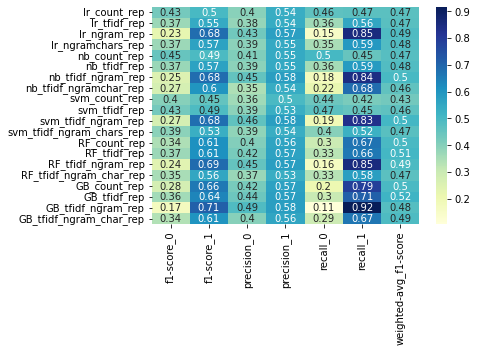

In [168]:
sns.heatmap(reports_df, cmap='YlGnBu', annot = True)

In [169]:
#Compare Models based on Weighted F1-Score
weighted_compar = reports_df.sort_values(by='weighted-avg_f1-score', ascending=False)
weighted_compar[['weighted-avg_f1-score']]

,weighted-avg_f1-score
GB_tfidf_rep,0.516849
RF_tfidf_rep,0.506067
svm_tfidf_ngram_rep,0.504493
nb_tfidf_ngram_rep,0.498529
GB_count_rep,0.495134
RF_count_rep,0.495025
RF_tfidf_ngram_rep,0.494304
GB_tfidf_ngram_char_rep,0.489846
lr_ngram_rep,0.486374
nb_tfidf_rep,0.483583


## Grid Search CV

In [170]:
from sklearn.model_selection import GridSearchCV

### Naive Bayes

In [171]:
# define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10]
}

# create the model object
nb = MultinomialNB()

# create the GridSearchCV object
gs_nb = GridSearchCV(nb, param_grid, cv=5, n_jobs=-1, verbose=1)

# fit the GridSearchCV object to the data
gs_nb.fit(X_train_tfidf_ngram, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10]}, verbose=1)

In [172]:
best_nb = MultinomialNB(**gs_nb.best_params_)

In [173]:
best_nb.fit(X_train_tfidf_ngram, y_train)

MultinomialNB(alpha=10)

In [174]:
best_nb.score(X_test_tfidf_ngram, y_test)

0.5628140703517588

### SVM

In [175]:
# define parameter grid
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.1, 1, 'scale'],
              'kernel': ['linear', 'rbf']}

# create SVM classifier
svm = SVC()

# create grid search object
gs_svc = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# fit grid search object to the data
gs_svc.fit(X_train_tfidf_ngram, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [176]:
# print best parameters and accuracy score
print(f"Best parameters: {gs_svc.best_params_}")
print(f"Best accuracy score: {gs_svc.best_score_}")

Best parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best accuracy score: 0.5267128014037578


In [177]:
best_svc = SVC(C=gs_svc.best_params_['C'], kernel=gs_svc.best_params_['kernel'], gamma=gs_svc.best_params_['gamma'])
print(best_svc)


SVC(C=0.1, gamma=0.1, kernel='linear')


In [178]:
best_svc.fit(X_train_tfidf_ngram, y_train)

SVC(C=0.1, gamma=0.1, kernel='linear')

In [179]:
best_svc.score(X_test_tfidf_ngram, y_test)

0.5703517587939698

### Random Forest

In [180]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}


gs_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
gs_rf.fit(X_train_tfidf_ngram, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", gs_rf.best_params_)
print("Best accuracy score:", gs_rf.best_score_)

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best accuracy score: 0.5374006821632066


In [181]:
best_rf = RandomForestClassifier(**gs_rf.best_params_)

In [182]:
best_rf.fit(X_train_tfidf_ngram, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5)

In [183]:
best_rf.score(X_test_tfidf_ngram, y_test)

0.5703517587939698

### Boosting

In [184]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb = GradientBoostingClassifier()

gs_gb = GridSearchCV(gb, param_grid_gb, cv=5, n_jobs=-1, verbose=1)

gs_gb.fit(X_train_tfidf_ngram, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters for GB:", gs_gb.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best hyperparameters for GB: {'learning_rate': 1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [185]:
best_gb = GradientBoostingClassifier(**gs_gb.best_params_)

In [186]:
best_gb.fit(X_train_tfidf_ngram, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=5, min_samples_leaf=4,
                           min_samples_split=5)

In [187]:
best_gb.score(X_test_tfidf_ngram, y_test)

0.5577889447236181

In [188]:
var_dict = {'lr_count_rep': lr_count_rep, 'lr_tfidf_rep': lr_tfidf_rep, 'lr_ngram_rep': lr_ngram_rep, 
            'lr_ngramchars_rep': lr_ngramchars_rep, 'nb_count_rep': nb_count_rep, 'nb_tfidf_rep': nb_tfidf_rep, 
            'nb_tfidf_ngram_rep': nb_tfidf_ngram_rep, 'nb_tfidf_ngramchar_rep': nb_tfidf_ngramchar_rep, 
            'svm_count_rep': svm_count_rep, 'svm_tfidf_rep': svm_tfidf_rep, 'svm_tfidf_ngram_rep': svm_tfidf_ngram_rep, 
            'svm_tfidf_ngram_chars_rep': svm_tfidf_ngram_chars_rep, 'RF_count_rep': RF_count_rep, 
            'RF_tfidf_rep': RF_tfidf_rep, 'RF_tfidf_ngram_rep': RF_tfidf_ngram_rep, 'RF_tfidf_ngram_char_rep': RF_tfidf_ngram_char_rep,
            'GB_count_rep': GB_count_rep, 'GB_tfidf_rep': GB_tfidf_rep, 'GB_tfidf_ngram_rep': GB_tfidf_ngram_rep,
            'GB_tfidf_ngram_char_rep': GB_tfidf_ngram_char_rep}

In [189]:
reports[3]

{'0': {'precision': 0.39215686274509803,
  'recall': 0.3508771929824561,
  'f1-score': 0.3703703703703704,
  'support': 171},
 '1': {'precision': 0.5469387755102041,
  'recall': 0.5903083700440529,
  'f1-score': 0.5677966101694916,
  'support': 227},
 'accuracy': 0.48743718592964824,
 'macro avg': {'precision': 0.4695478191276511,
  'recall': 0.4705927815132545,
  'f1-score': 0.469083490269931,
  'support': 398},
 'weighted avg': {'precision': 0.4804369989201711,
  'recall': 0.48743718592964824,
  'f1-score': 0.48297277347187917,
  'support': 398}}

In [190]:
svm_tfidf_rep

{'0': {'precision': 0.39215686274509803,
  'recall': 0.4678362573099415,
  'f1-score': 0.4266666666666667,
  'support': 171},
 '1': {'precision': 0.5309278350515464,
  'recall': 0.45374449339207046,
  'f1-score': 0.48931116389548696,
  'support': 227},
 'accuracy': 0.45979899497487436,
 'macro avg': {'precision': 0.46154234889832224,
  'recall': 0.460790375351006,
  'f1-score': 0.4579889152810768,
  'support': 398},
 'weighted avg': {'precision': 0.47130513086963016,
  'recall': 0.45979899497487436,
  'f1-score': 0.46239606583988824,
  'support': 398}}